# Drawing Shapefiles in Python with Matplotlib

If you are using python for spatial processing, it is sometimes useful to plot your data. In these cases, it may also be helpful to render a simple map to help locate the data. This notebook will show you how plot a shapefile using pyplot for this purpose.

## Dependencies

If you don't have `pyshp` or `pyproj` in your jupyter environement, install them now:

In [ ]:
!pip install pyshp pyproj

## Loading the Shapefile

This notebook uses the [1:110m Natural Earth countries](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/) shapefile.

After loading the shapefile, we also fetch the index of the "MAPCOLOR7" field so that we can paint different countries different colors.

You can also use your own shapefile - just copy it to the same folder as this notebook, and update the filename passed to `shapefile.Reader`. You may also need to update `mapcolor_idx` field to reference an attribute that exists in your shapefile.

In [18]:
import shapefile

sf = shapefile.Reader("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

mapcolor_idx = [field[0] for field in sf.fields].index("MAPCOLOR7")-1
mapcolor_map = [
    "#000000",
    "#fbb4ae",
    "#b3cde3",
    "#ccebc5",
    "#decbe4",
    "#fed9a6",
    "#ffffcc",
    "#e5d8bd",
]

## Reprojection

The countries shapefile is in the WGS 84 projetion (`EPSG:4326`). We will reproject to Web Mercator (`EPSG:3857`) to demonstrate how reprojection. To do this, we construct a `Transformer` using `pyproj`.

At the same time, set up the rendering bounds. For simplicity, define the bounds in lat/lon and reproject to meters. Note that `pyplot` expects bounds in `minx,maxx,miny,maxy` order, while `pyproj` transform works on in `x,y` pairs.

In [19]:
import pyproj

transformer = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)

BOUNDS = [-180, 180, -75, 80]
BOUNDS[0],BOUNDS[2] = transformer.transform(BOUNDS[0],BOUNDS[2])
BOUNDS[1],BOUNDS[3] = transformer.transform(BOUNDS[1],BOUNDS[3])

## Plotting the Data

To display the shapefile, iterate through the shapes in the shapefile. Fetch the mapcolor attribute for each shape and use it to determine the fill color. Collect the points for each shape, and transform them to `EPSG:3857` using the transformer constructed above. Plot each shape with pyplot using `fill` for the fill and `plot` for the outline.

Finaly, set the bounds on the plot.

<IPython.core.display.Javascript object>


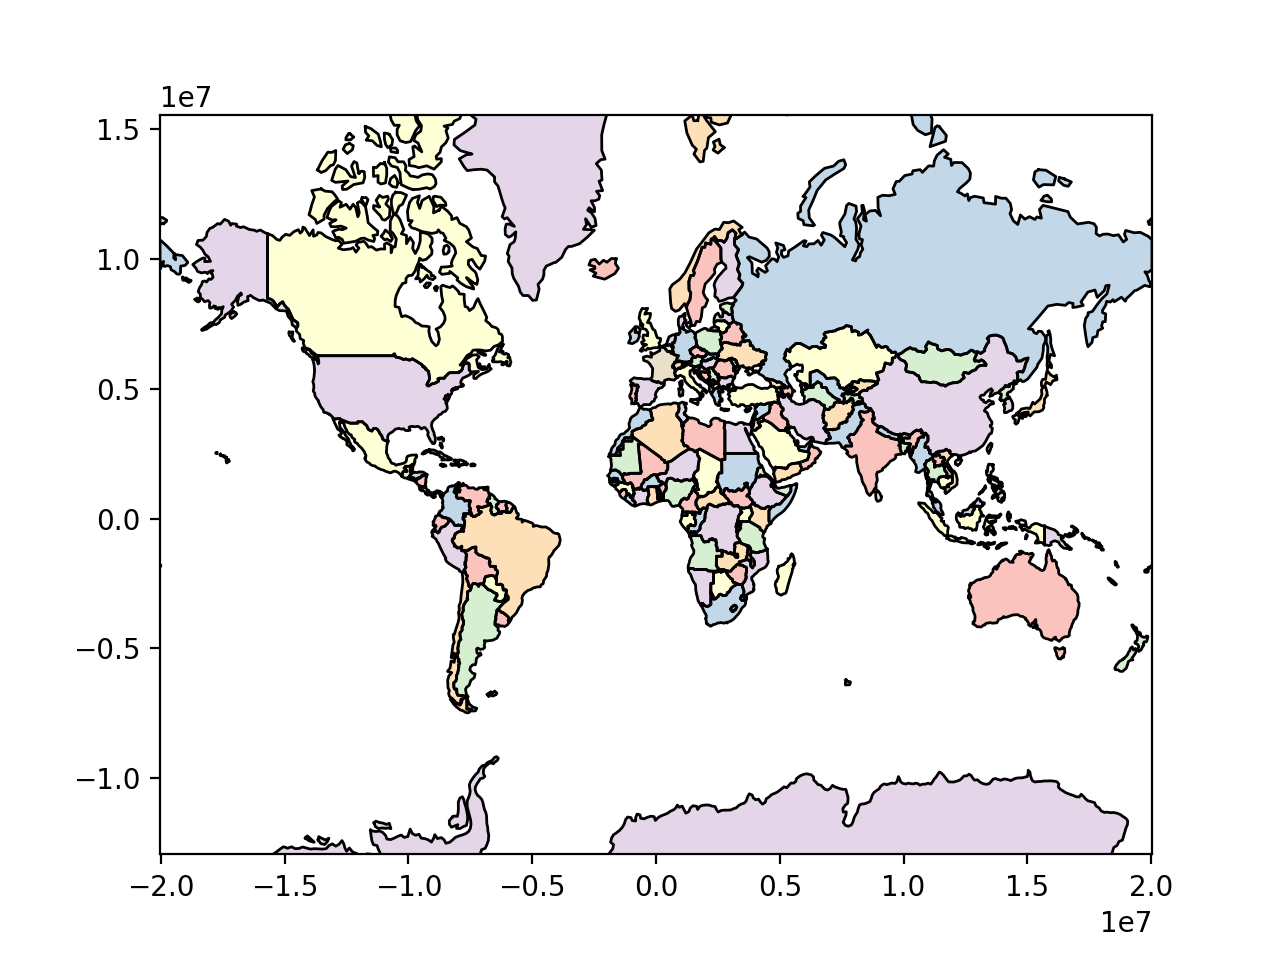

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        fillcolor=mapcolor_map[shape.record[mapcolor_idx]]
        
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        points = list(transformer.itransform(shape.shape.points[i_start:i_end]))

        x = [i[0] for i in points]
        y = [i[1] for i in points]
        #Poly Fill
        plt.fill(x,y, facecolor=fillcolor, alpha=0.8)
        #Poly line
        plt.plot(x,y, color='#000000', alpha=1, linewidth=1)
        
ax = plt.axis(BOUNDS)